In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/linalg/__init__.py:202: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/optimize/_trlib/__init__.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trlib import TRLIBQuadraticSubproblem
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/sparse/lil.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [2]:
import coronagraph as cg
from jakely.plot import ColorTable

/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:94: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .ckdtree import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/__init__.py:95: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .qhull import *
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/_spherical_voronoi.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _voronoi
/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/spatial/distance.py:121: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, go

In [3]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [47]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

# Setup DRM for LUVOIR A (APLC)

In [5]:
drmA_APLC1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC1)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC1.generate_exptime_table()

No exact match found
Using F5V for F3/F5V


/Users/Jake/anaconda2/lib/python2.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1017: RuntimeWarning: invalid value encountered in greater
  i = (cp > 0.)
/Users/Jake/Projects/coronagraph/coronagraph/noise_routines.py:1018: RuntimeWarning: invalid value encountered in less_equal
  j = (cp <= 0.0)


No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


In [6]:
drmA_APLC2 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC2)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC2.generate_exptime_table()

No exact match found
Using F5V for F3/F5V
No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


In [7]:
drmA_APLC3 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "A (APLC3)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmA_APLC3.generate_exptime_table()

No exact match found
Using F5V for F3/F5V
No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F7V for F7V:
No exact match found
Using G1V for G1.5Vb
No exact match found
Using G8IV for G8IV-V
No exact match found
Using M2V for M2
No exact match found
Using M2V for M2Vvar
No exact match found
Using G8V for G8Vvar
No exact match found
Using F0IV for F0IV/V
No exact match found
Using G0V for G0Vs
No exact match found
Using M5V for M5Ve
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using F7V for F6/F7V
No exact match found
Using K5V for K5
No exact match found
Using G5IV for G5IV-Vvar
No exact match found
Using K0V for G8/K0V


## Determine the optimal coronagraph masks to use for each bandpass and for each star

In [8]:
# Combine into exposure time grid into 3d array
tpbpcs3d = np.array([drmA_APLC1.tpbpcs_rect, drmA_APLC2.tpbpcs_rect, drmA_APLC3.tpbpcs_rect])

# Convert nans to infs before minimizing
tpbpcs3d[np.isnan(tpbpcs3d)] = np.inf

# Find the mask with the lowest exposure time for each bp and for each star 
best_masks = np.argmin(tpbpcs3d, axis=0)     # These are the mask indicies
tpbpcs_rect_new = np.min(tpbpcs3d, axis=0)   # These are the exposure times for using the optimal masks

# Convert the infs back to nans for consistency
tpbpcs_rect_new[np.isinf(tpbpcs_rect_new)] = np.nan

# Completeness by target
tot_completeness = np.sum(np.isfinite(tpbpcs_rect_new) * drmA_APLC1.bp_frac, axis=1)

# Fraction of stars in biased sample that can completely observe each bandpass
frac_bias_bp = np.sum(np.isfinite(tpbpcs_rect_new)*1.0, axis=0) / drmA_APLC1.NBIAS

# Create new DRM object with the combined properties
drmA_APLCx = copy.deepcopy(drmA_APLC1)
drmA_APLCx.tpbpcs_rect = tpbpcs_rect_new
drmA_APLCx.tot_completeness = tot_completeness
drmA_APLCx.frac_bias_bp = frac_bias_bp
drmA_APLCx._make_pandas_table()

/Users/Jake/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


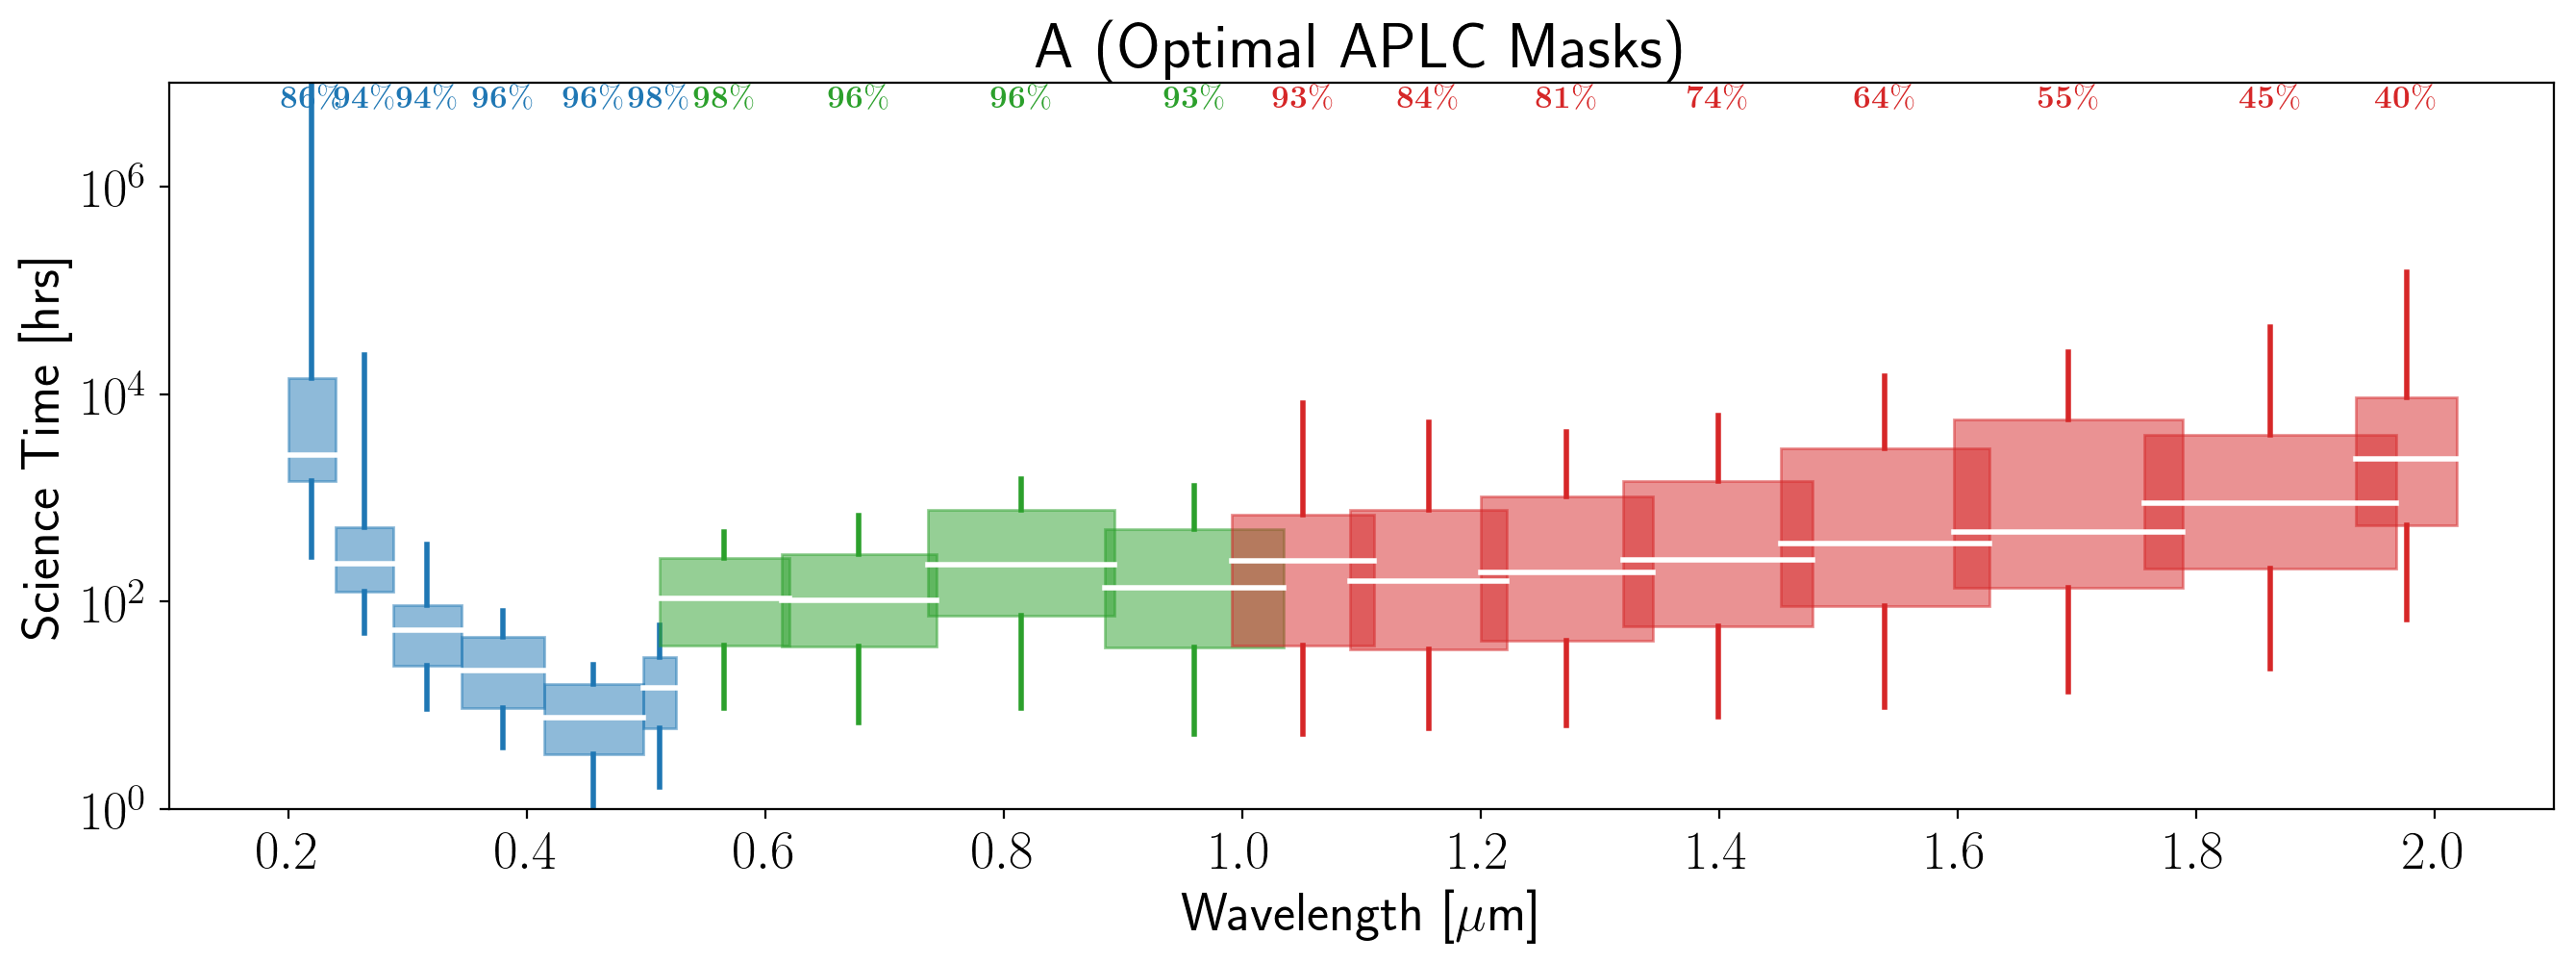

In [9]:
fig = drmA_APLCx.plot_bp_exptimes(plot_spectrum=False, title = "A (Optimal APLC Masks)")

# Set DRM for LUVOIR-B (DMVC)

In [10]:
drmB_DMVC = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    #bandwidth = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "B (DMVC1)",       # Now specifying APLC coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmB_DMVC.generate_exptime_table()

No exact match found
Using F5V for F3/F5V
No exact match found
Using G1V for G1.5Vb
No exact match found
Using F7V for F6/F7V
No exact match found
Using K0V for K0VSB
No exact match found
Using G6IV for G6IV+...
No exact match found
Using M2V for M1/M2V
No exact match found
Using K4V for K4Vp


# Setup DRM for LUVOIR-B (PIAA)

In [11]:
drmB_PIAA1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = [0.2, 0.2, 0.1],     # Using channel dependent bandwidth
    architecture = "B (PIAA1)",       # Now specifying PIAA coronagraph 
    telescope_mods = {})

# Calculate table of exposure times
drmB_PIAA1.generate_exptime_table()

No exact match found
Using F7IV for F7IV-V
No exact match found
Using G0V for G0.5IV
No exact match found
Using F8V for F8VSB
No exact match found
Using G8V for G8Vvar
No exact match found
Using M5V for M5Ve
No exact match found
Using K0V for K0
No exact match found
Using M0V for M0
No exact match found
Using G5V for G3/G5V
No exact match found
Using K5V for K5
No exact match found
Using G8IV for G8IVvar
No exact match found
Using M5V for M5
No exact match found
Using K4V for K4Vp


# Run DRMs

In [12]:
# Set generic DRM object name
drmx = drmA_APLCx

# List of DRMs
drms = [drmA_APLCx, drmB_DMVC, drmB_PIAA1]

drm_names = ["LUVOIR-A (APLC)", "LUVOIR-B (DMVC)", "LUVOIR-B (PIAA)"]

In [13]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-1 UV", 
    "-1 UV; -1 NIR", 
    "-1 UV; -2 NIR", 
    "-2 UV; -4 NIR",
    "-2 UV; No NIR",
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    spectroscopy.get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=1), 
    spectroscopy.get_iremove(drmx, Nremove_uv=1, Nremove_nir=2), 
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=4),
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=8),
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Indices of bandpasses to use for each test case
iuse_bps = np.array([np.delete(np.arange(len(drmx.bandpasses)), cases[icase]) for icase in range(len(cases))])

# Complete wavelength ranges for each case
case_ranges = np.array([[drmx.bandpasses[ind].min(), drmx.bandpasses[ind].max()] for ind in iuse_bps])
case_range_strings = ["%.2f - %.2f $\mu$m" %(case_ranges[i,0], case_ranges[i,1]) for i in range(len(case_ranges))]

# Wavelength range completeness (assuming the first case is the full range "all")
case_completeness = (case_ranges[:,1] - case_ranges[:,0]) / (case_ranges[0,1] - case_ranges[0,0])

Text(0,1,'Number of exoEarth candidate spectra in 12 months')

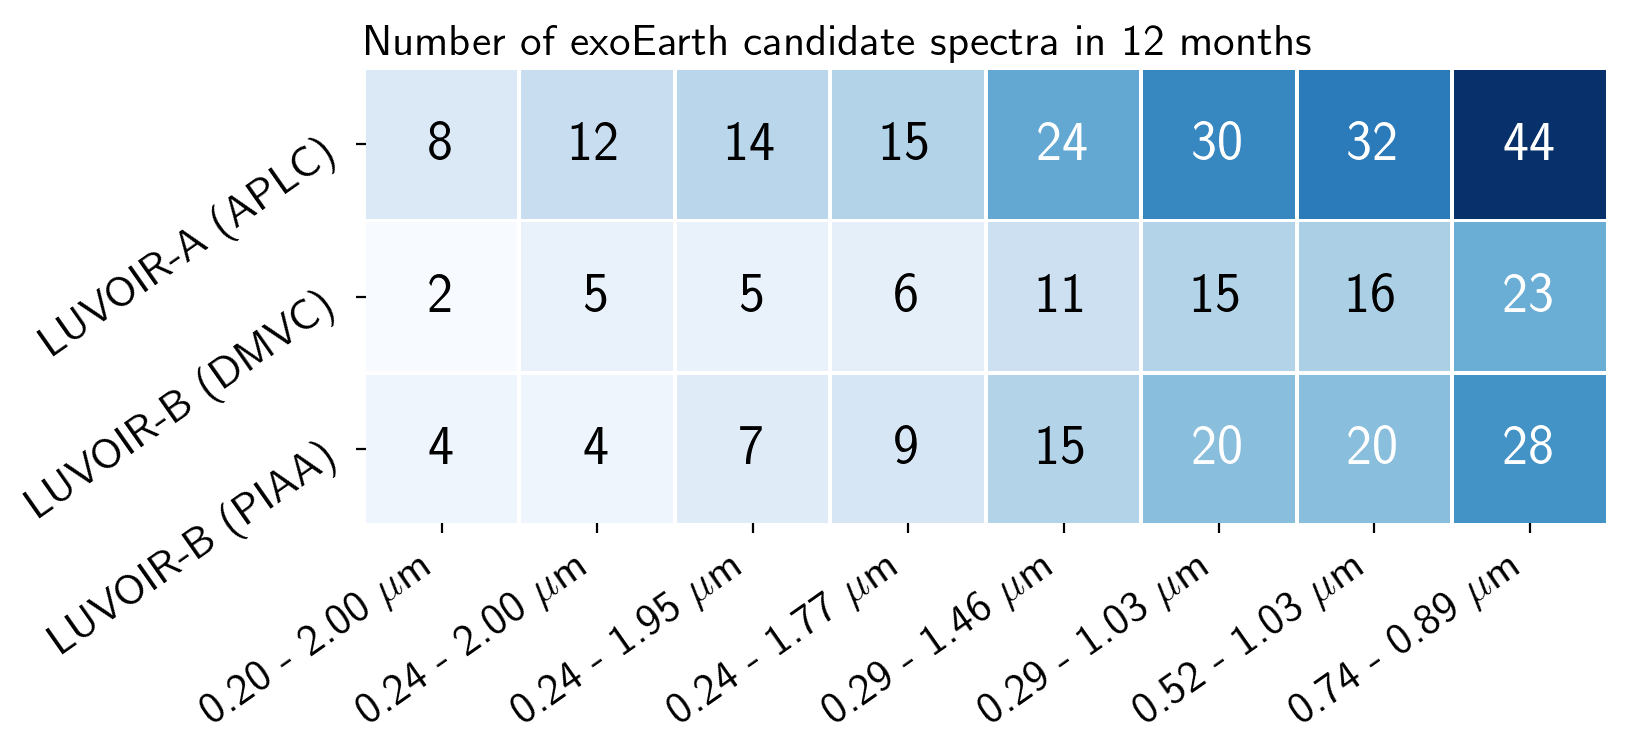

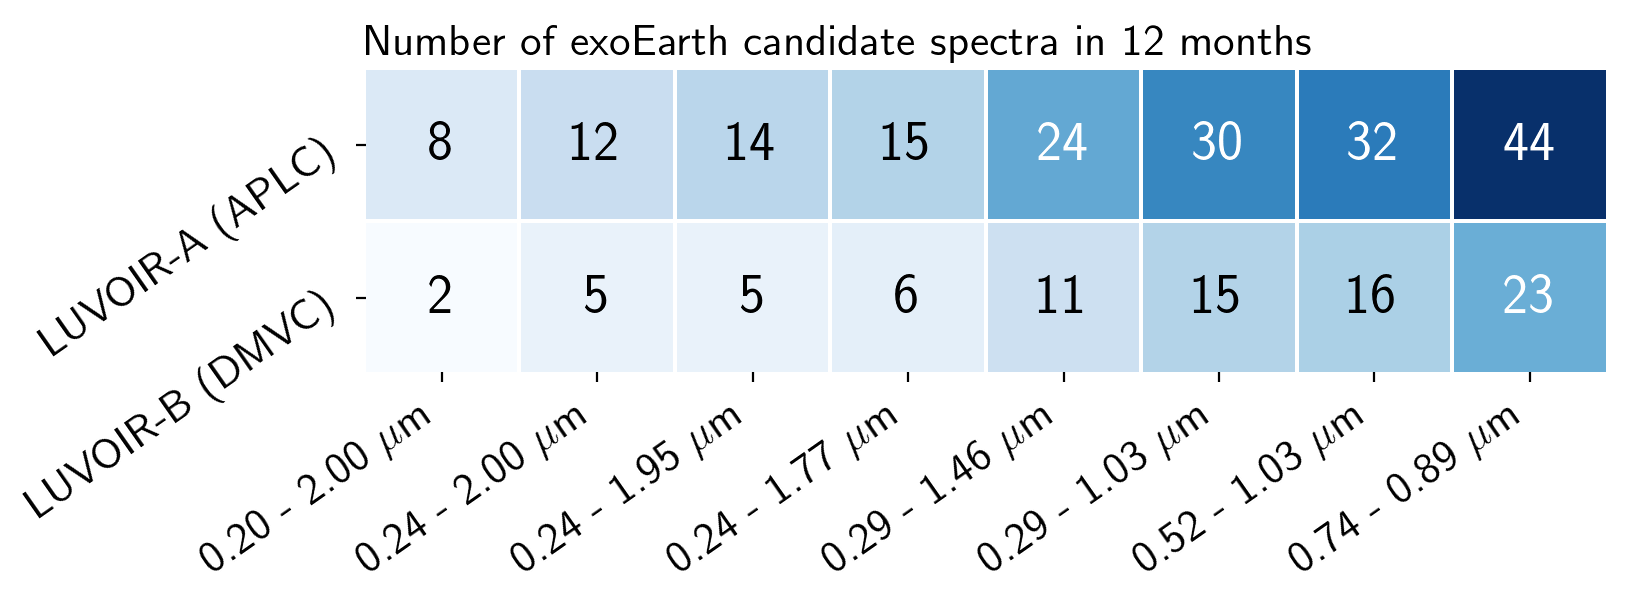

In [14]:
wantexp_days = 365.
eta = 1.0

# Define eta range
Xdraw = 2
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(drms), len(cases), 3))
t_scix = np.zeros((len(drms), len(cases), 3))
t_ovrx = np.zeros((len(drms), len(cases), 3))
countx = np.zeros((len(drms), len(cases), 3))
for i in range(len(drms)):
    Ndraw = int(np.round(eta*drms[i].NBIAS))
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drms[i].run_hec_drm(Ndraw = Ndraw, 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
        
# Make Table of results
fig, ax = ColorTable(case_range_strings, drm_names, countx[:,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                     ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of exoEarth candidate spectra in 12 months", ha = "left", fontsize = 16, loc = "left")

# Make Table of results
fig, ax = ColorTable(case_range_strings, drm_names[:-1], countx[:-1,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                     ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of exoEarth candidate spectra in 12 months", ha = "left", fontsize = 16, loc = "left")

Text(0,1,'Number of exoEarth candidate spectra in 6 months')

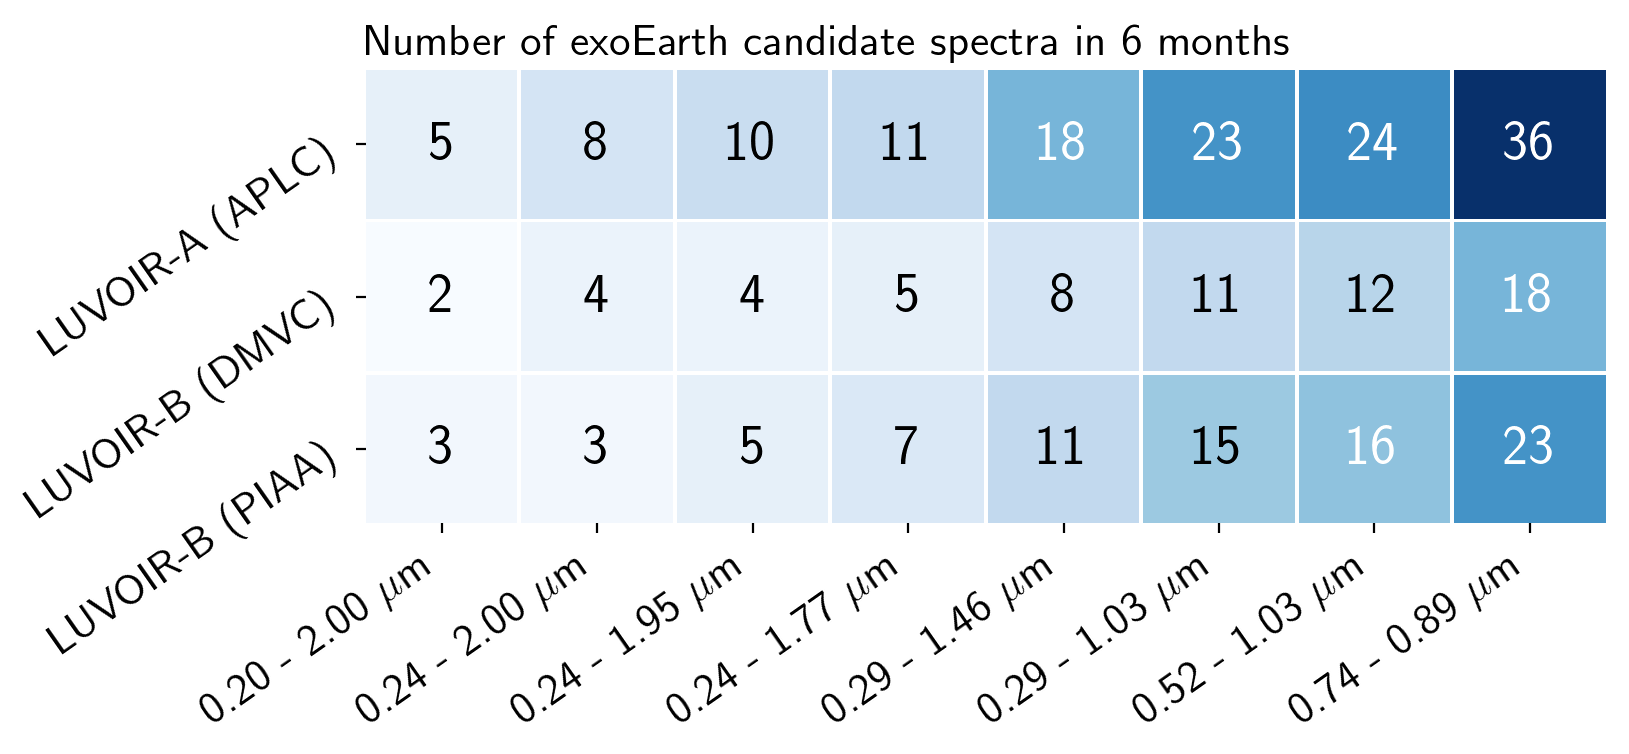

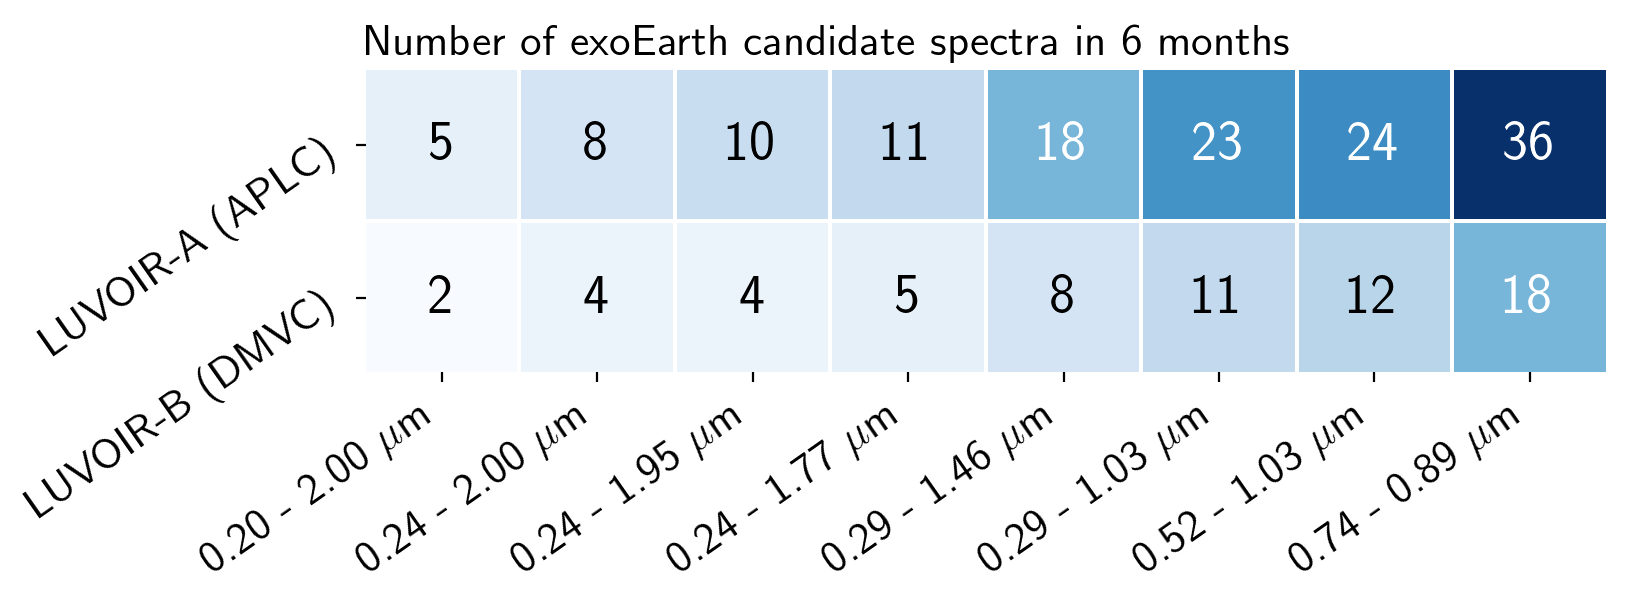

In [15]:
wantexp_days = 365. / 2
eta = 1.0

# Define eta range
Xdraw = 2
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(drms), len(cases), 3))
t_scix = np.zeros((len(drms), len(cases), 3))
t_ovrx = np.zeros((len(drms), len(cases), 3))
countx = np.zeros((len(drms), len(cases), 3))
for i in range(len(drms)):
    Ndraw = int(np.round(eta*drms[i].NBIAS))
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drms[i].run_hec_drm(Ndraw = Ndraw, 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
        
# Make Table of results
fig, ax = ColorTable(case_range_strings, drm_names, countx[:,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                     ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of exoEarth candidate spectra in 6 months", ha = "left", fontsize = 16, loc = "left")

# Make Table of results
fig, ax = ColorTable(case_range_strings, drm_names[:-1], countx[:-1,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                     ylabel_spacing=-0.35, xlabel_spacing = 0.01)
ax[0,0].set_title("Number of exoEarth candidate spectra in 6 months", ha = "left", fontsize = 16, loc = "left")

In [19]:
# Define cases 
ibp = np.arange(len(drmx.bp_names))
case_names = [
    "All", 
    "-2 UV; -4 NIR",
    "-2 UV; No NIR",
    "Only vis",
    r"Only O$_2$ A-Band"
]
cases = [
    spectroscopy.get_iremove(drmx, Nremove_uv=0, Nremove_nir=0), 
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=4),
    spectroscopy.get_iremove(drmx, Nremove_uv=2, Nremove_nir=8),
    ibp[(drmx.bp_chan == 0) | (drmx.bp_chan == 2)],
    ibp[(drmx.bandpasses[:,0] > 0.76) | (drmx.bandpasses[:,1] < 0.76)]
]

# Indices of bandpasses to use for each test case
iuse_bps = np.array([np.delete(np.arange(len(drmx.bandpasses)), cases[icase]) for icase in range(len(cases))])

# Complete wavelength ranges for each case
case_ranges = np.array([[drmx.bandpasses[ind].min(), drmx.bandpasses[ind].max()] for ind in iuse_bps])
case_range_strings = ["%.2f - %.2f $\mu$m" %(case_ranges[i,0], case_ranges[i,1]) for i in range(len(case_ranges))]

# Wavelength range completeness (assuming the first case is the full range "all")
case_completeness = (case_ranges[:,1] - case_ranges[:,0]) / (case_ranges[0,1] - case_ranges[0,0])

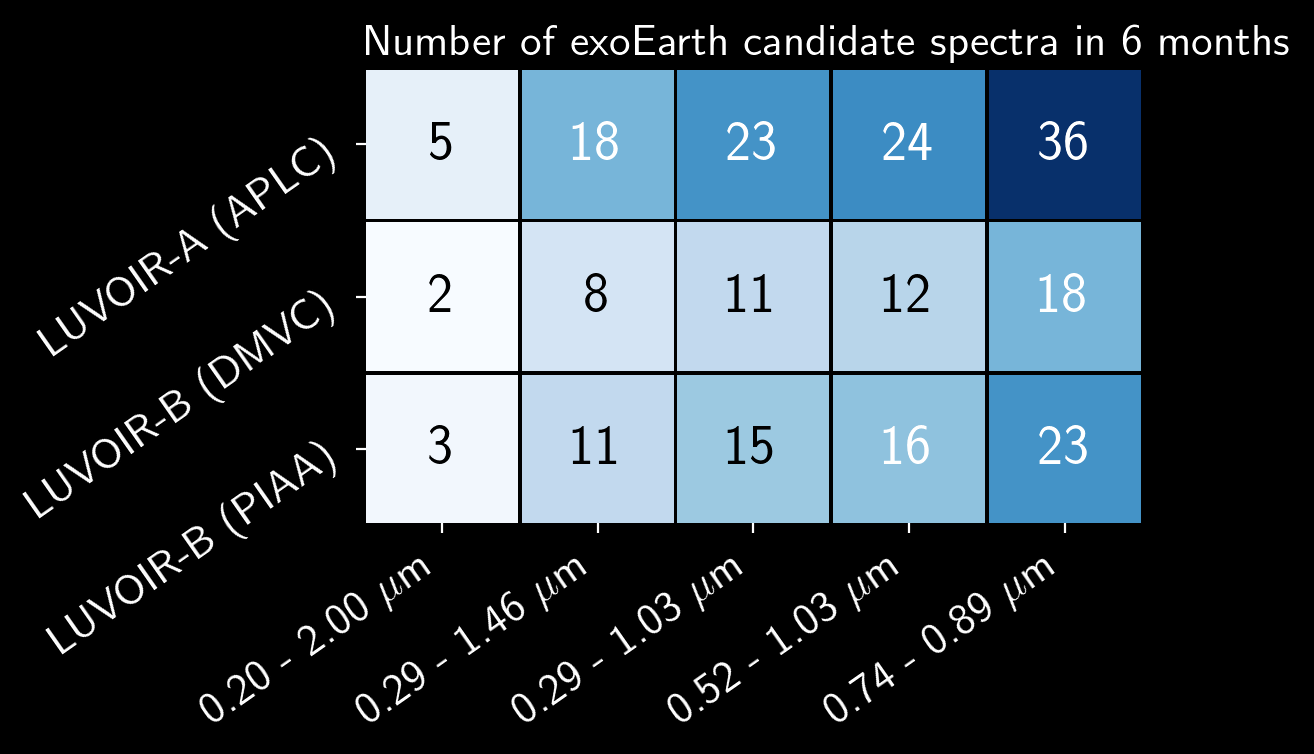

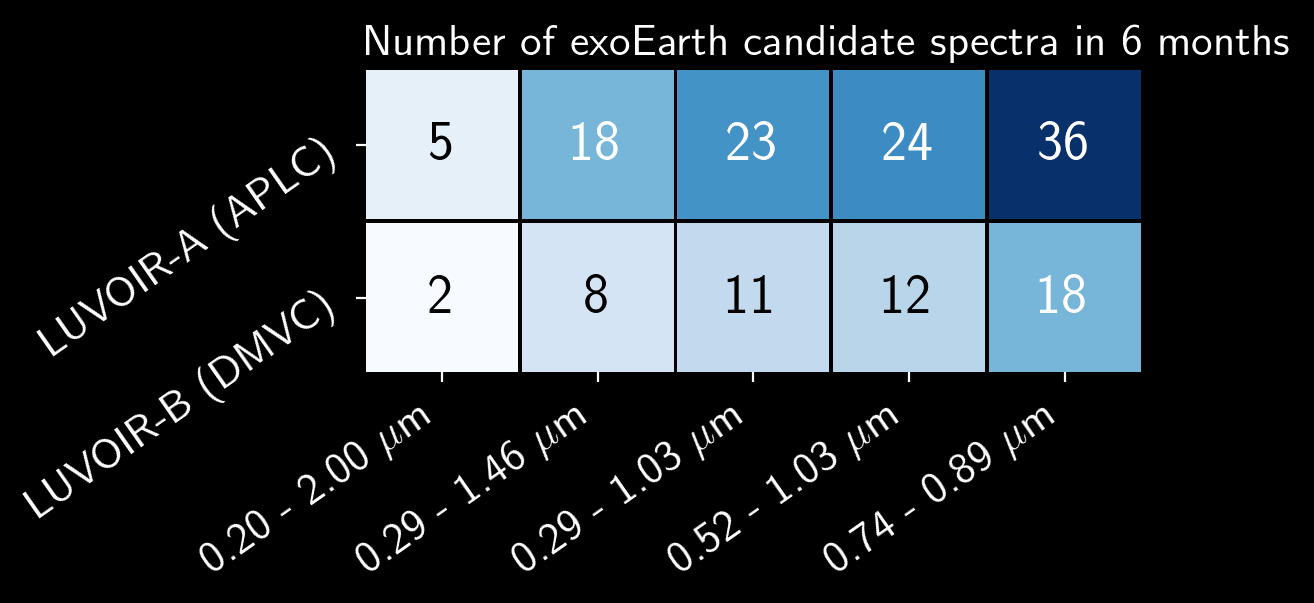

In [49]:
wantexp_days = 365. / 2
eta = 1.0

# Define eta range
Xdraw = 2
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(drms), len(cases), 3))
t_scix = np.zeros((len(drms), len(cases), 3))
t_ovrx = np.zeros((len(drms), len(cases), 3))
countx = np.zeros((len(drms), len(cases), 3))
for i in range(len(drms)):
    Ndraw = int(np.round(eta*drms[i].NBIAS))
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drms[i].run_hec_drm(Ndraw = Ndraw, 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
        

with plt.rc_context({'xtick.color' : 'white', 'ytick.color' : 'white', 'figure.facecolor' : 'black'}):
        
    # Make Table of results
    fig, ax = ColorTable(case_range_strings, drm_names, countx[:,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                         ylabel_spacing=-0.35, xlabel_spacing = 0.01)
    ax[0,0].set_title("Number of exoEarth candidate spectra in 6 months", ha = "left", fontsize = 16, loc = "left", color = "white")

    # Make Table of results
    fig, ax = ColorTable(case_range_strings, drm_names[:-1], countx[:-1,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                         ylabel_spacing=-0.35, xlabel_spacing = 0.01)
    ax[0,0].set_title("Number of exoEarth candidate spectra in 6 months", ha = "left", fontsize = 16, loc = "left", color = "white")

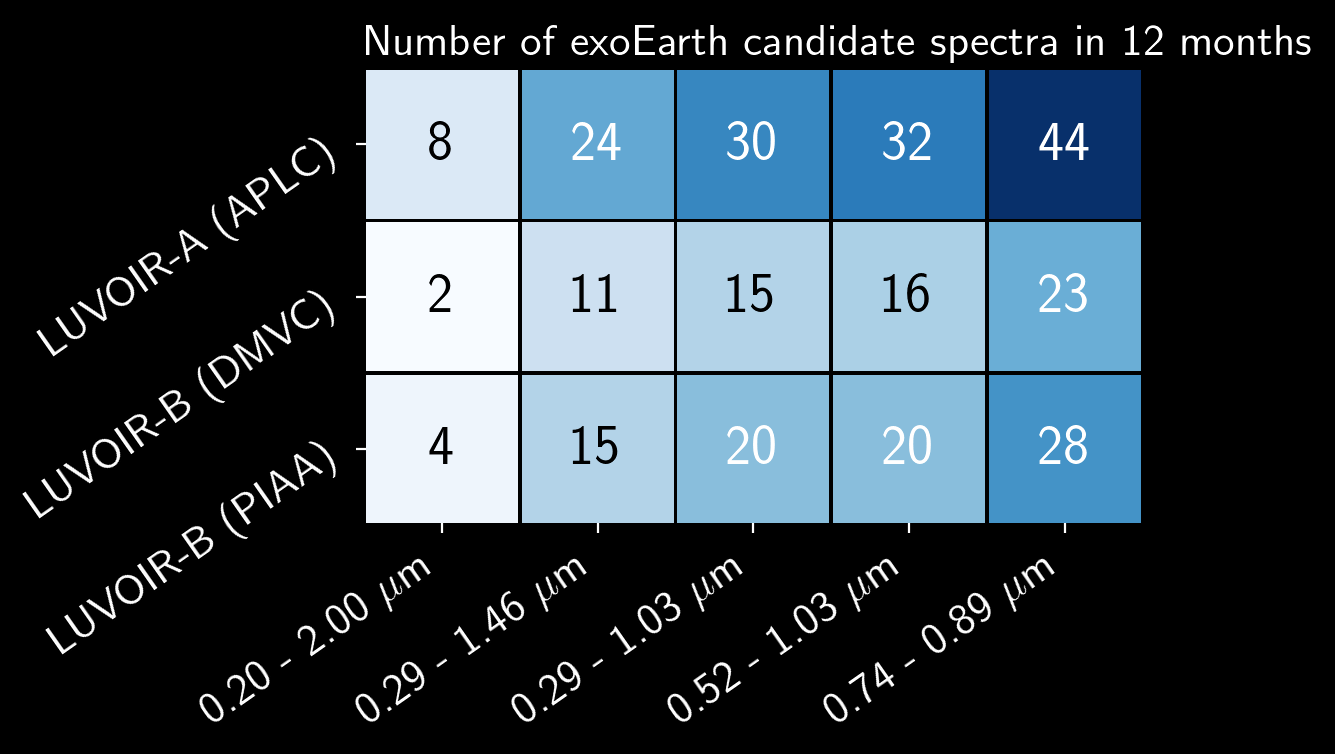

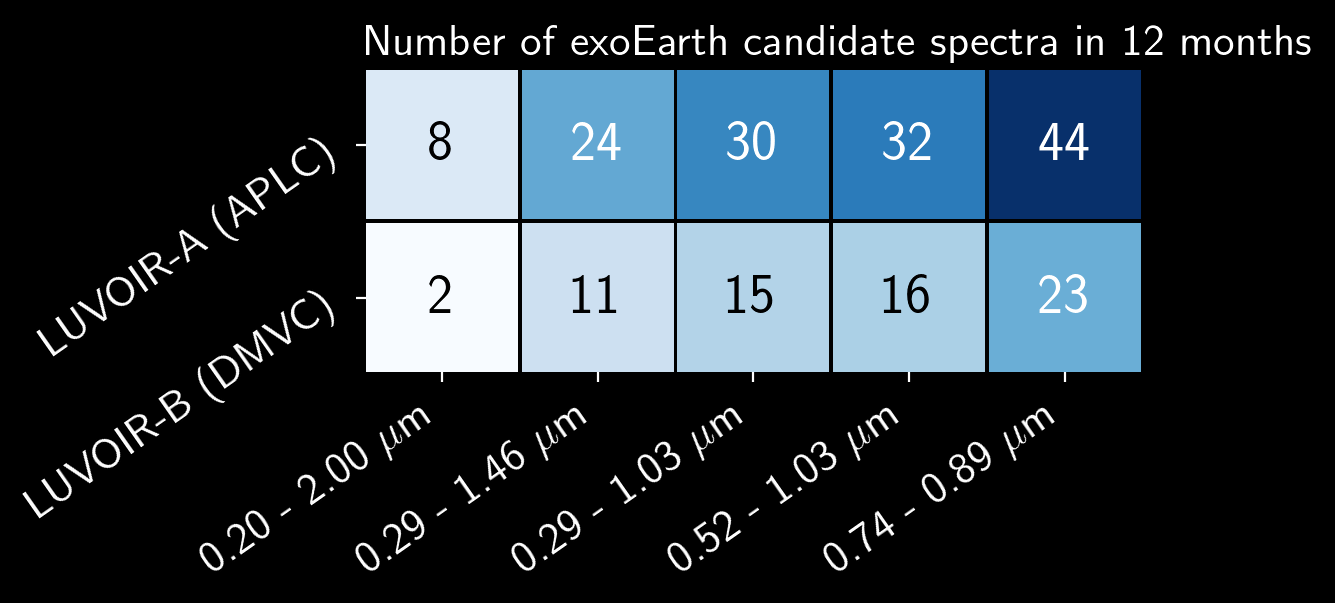

In [52]:
wantexp_days = 365.
eta = 1.0

# Define eta range
Xdraw = 2
etas = np.array([0.1, 0.2, 0.5, 1.0])
Ndraws = np.array(np.round(etas*drmx.NBIAS), dtype=int)

# Run DRM for Xdraw number of times
t_totx = np.zeros((len(drms), len(cases), 3))
t_scix = np.zeros((len(drms), len(cases), 3))
t_ovrx = np.zeros((len(drms), len(cases), 3))
countx = np.zeros((len(drms), len(cases), 3))
for i in range(len(drms)):
    Ndraw = int(np.round(eta*drms[i].NBIAS))
    for j in range(len(cases)):
        t_tmp = np.zeros(Xdraw)
        t_sci = np.zeros(Xdraw)
        t_ovr = np.zeros(Xdraw)
        c_tmp = np.zeros(Xdraw)
        for x in range(Xdraw):
            t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drms[i].run_hec_drm(Ndraw = Ndraw, 
                                                                                                           verbose = False, 
                                                                                                           iremove = cases[j], 
                                                                                                           wantexp_days=wantexp_days)
            t_tmp[x] = np.sum(t_tot_sort[:count_in_texp]) / 24.
            t_sci[x] = np.sum(t_sci_sort[:count_in_texp]) / 24.
            t_ovr[x] = np.sum(t_ovr_sort[:count_in_texp]) / 24.
            c_tmp[x] = count_in_texp
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_tmp)
        t_totx[i,j,0], t_totx[i,j,1], t_totx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_sci)
        t_scix[i,j,0], t_scix[i,j,1], t_scix[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(t_ovr)
        t_ovrx[i,j,0], t_ovrx[i,j,1], t_ovrx[i,j,2] = q_50, q_p, q_m
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_tmp)
        countx[i,j,0], countx[i,j,1], countx[i,j,2] = q_50, q_p, q_m
        

# Slick method to temporarily modify matplotlib rcParams
with plt.rc_context({'xtick.color' : 'white', 'ytick.color' : 'white', 'figure.facecolor' : 'black'}):
        
    # Make Table of results
    fig, ax = ColorTable(case_range_strings, drm_names, countx[:,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                         ylabel_spacing=-0.35, xlabel_spacing = 0.01)
    ax[0,0].set_title("Number of exoEarth candidate spectra in 12 months", ha = "left", fontsize = 16, loc = "left", color = "white")

    # Make Table of results
    fig, ax = ColorTable(case_range_strings, drm_names[:-1], countx[:-1,:,0].T, fmt = "%i", labelfontsize=16, labelrotation=35, 
                         ylabel_spacing=-0.35, xlabel_spacing = 0.01)
    ax[0,0].set_title("Number of exoEarth candidate spectra in 12 months", ha = "left", fontsize = 16, loc = "left", color = "white")

In [38]:
#fig.set_facecolor("white")
#fig.savefig("/Users/Jake/Desktop/tmp_table.pdf", edgecolor = "w", bbox_inches = "tight")

# Stats on Stars in the "Biased sample" 

In [16]:
spectroscopy.ARCH_FILES

[u'../inputs/LUVOIR-Architecture_A-LBTI_NOMINAL_2-NOMINAL_OCCRATES-APLC_3masks-AVC6-target_list.csv',
 u'../inputs/LUVOIR-Architecture_B-LBTI_NOMINAL_2-NOMINAL_OCCRATES-DMVC6-target_list.csv',
 u'../inputs/LUVOIR-Architecture_B-LBTI_NOMINAL_2-NOMINAL_OCCRATES-PIAA_mix-target_list.csv']

In [17]:
Ydraw = 1000

totcA = np.zeros(Ydraw)
totcB1 = np.zeros(Ydraw)
totcB2 = np.zeros(Ydraw)
tottA = np.zeros(Ydraw)
tottB1 = np.zeros(Ydraw)
tottB2 = np.zeros(Ydraw)
nezA = []
nezB1 = []
nezB2 = []

for i in range(Ydraw):
    
    A = spectroscopy.gen_candidate_catalog(spectroscopy.ARCH_FILES[0])
    B1 = spectroscopy.gen_candidate_catalog(spectroscopy.ARCH_FILES[1])
    B2 = spectroscopy.gen_candidate_catalog(spectroscopy.ARCH_FILES[2])
    
    totcA[i] = A["total count"]
    totcB1[i] = B1["total count"]
    totcB2[i] = B2["total count"]
    tottA[i] = A["total deep time"]
    tottB1[i] = B1["total deep time"]
    tottB2[i] = B2["total deep time"]
    nezA.append(A["nez"])
    nezB1.append(B1["nez"])
    nezB2.append(B2["nez"])

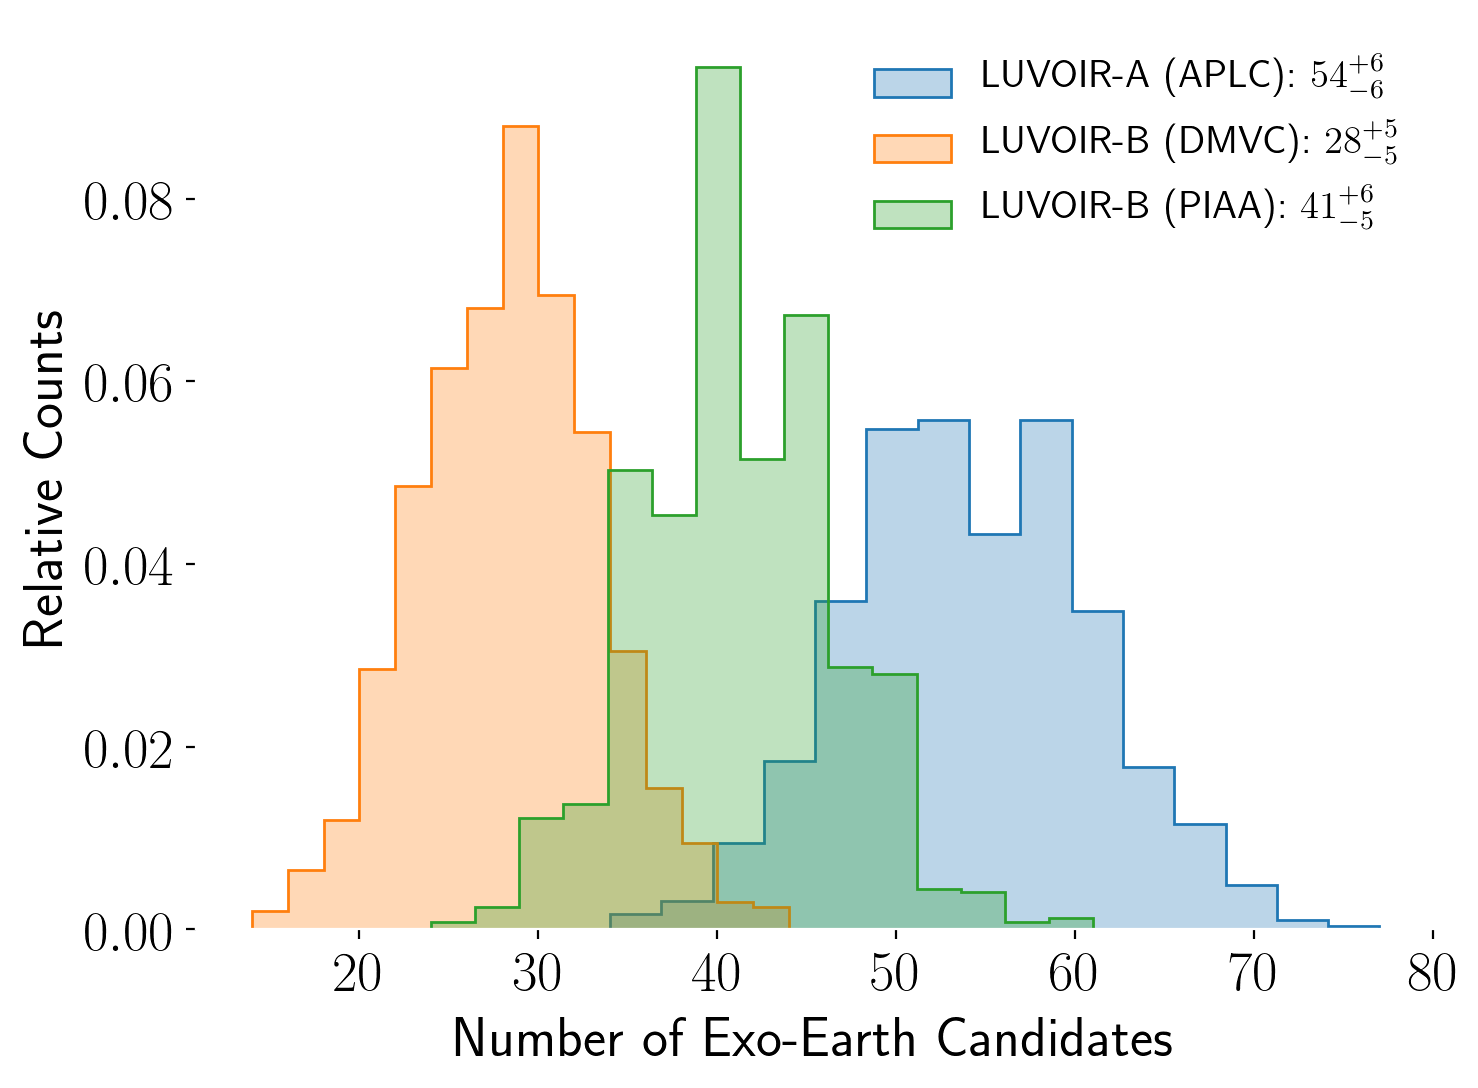

In [50]:
# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Number of Exo-Earth Candidates")
ax.set_ylabel("Relative Counts")
#ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drmx.Ndraw)/float(drmx.NBIAS), drmx.Ndraw, drmx.NBIAS))

labels = []
handles = []
bins = 15
    
label = "LUVOIR-A (APLC)"
color = "C0"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(totcA)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(totcA, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(totcA, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

label = "LUVOIR-B (DMVC)"
color = "C1"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(totcB1)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(totcB1, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(totcB1, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

label = "LUVOIR-B (PIAA)"
color = "C2"
q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(totcB2)
result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
h = ax.hist(totcB2, bins = bins, alpha = .3, color = color, normed=True);
h2 = ax.hist(totcB2, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
handles.append((h[2][0], h2[2][0]))
#ax.axvline(q_50, color = "w", ls = "dashed")
#ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
labels.append(label+": %s" %result)

#ax.set_xscale("log")
ax.legend(handles, labels, fontsize = 14, framealpha = 0.0)